In [22]:
"""
The purpose of the algorithm is not to recover the original network but 
rather to identify important nodes and understand their impact on the network structure
"""
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import similarity as sm

In [23]:
""" 
Remove nodes starting with highest betweenness centrality score
A node is having High betweenness centrality means it falls in between shortest paths of 
many nodes Due to this, there can be congestion in that particular node and leads to 
bottleneck and eventually Slows down the networkin most real-world networks, there are often
multiple shortest paths between pairs of nodes, not just one. So even if we remove a node
that lies on one shortest path, there may be other paths that can still connect the same 
pair of nodes.So by removing the node we force some traffic to take alternative routes
that improves network efficiency
"""
def optimize_graph_by_betweenness_centrality(G):
    # Compute the betweenness centrality for each node
    betweenness = nx.betweenness_centrality(G)
    print(betweenness)
    # Sort nodes in descending order based on betweenness centrality score
    sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
    print(sorted_nodes)
    threshold = 0.8  # We want to retain at least 80% of the nodes
    removed_nodes = set()
    for node in sorted_nodes:
        # Removing the node that is having the highest betweenness centrality
        print(node)
        G.remove_node(node)
        removed_nodes.add(node)
        if len(removed_nodes) > 0:
            remaining_graph = G.subgraph(G.nodes - removed_nodes)
            # Finding the largest connected component
            largest_cc = max(nx.connected_components(remaining_graph), key=len)
            # Checking whether the size of the largest connected component
            # of the subgraph obtained by removing nodes with high betweenness centrality
            # is smaller than a certain fraction of the size of the original network.
            if len(largest_cc) < threshold * len(G):
                break
    return G, removed_nodes

In [24]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, k=0.3), with_labels=True, node_size=100,font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)

In [25]:
# Load the original graph
original_graph= nx.karate_club_graph()
G=original_graph.copy()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
[0, 33, 32, 2, 31, 8, 1, 13, 19, 5, 6, 27, 23, 30, 3, 25, 29, 24, 28, 9, 4, 10, 7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
0
33
32
{0, 33, 32}


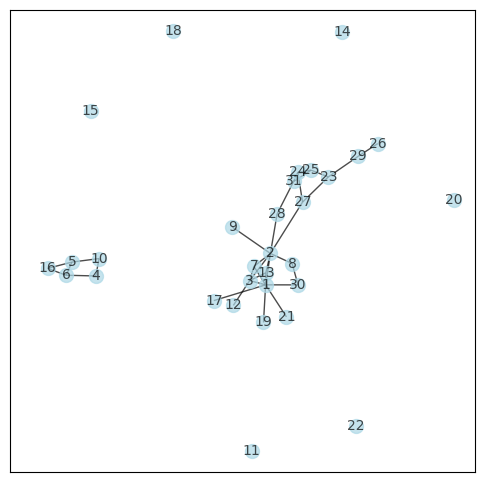

In [26]:
optimized_graph, removed_nodes = optimize_graph_by_betweenness_centrality(G)
# Draw the remaining graph
print(removed_nodes)
draw_graph(optimized_graph)

In [27]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Betweenness Centrality'"""
print('Similarity of Betweenness Centrality is ',sm.compare_betweenness_centrality(original_graph,optimized_graph,removed_nodes),'%')

31
{1: 0.13869731800766283, 2: 0.24559386973180078, 3: 0.042145593869731796, 4: 0.0011494252873563218, 5: 0.0034482758620689655, 6: 0.0034482758620689655, 7: 0.0, 8: 0.011494252873563218, 9: 0.0, 10: 0.0011494252873563218, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.08850574712643676, 24: 0.012643678160919542, 25: 0.013793103448275862, 26: 0.0, 27: 0.135632183908046, 28: 0.0367816091954023, 29: 0.041379310344827586, 30: 0.004597701149425287, 31: 0.01724137931034483}
Similarity of Betweenness Centrality is  95.03 %


In [28]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Degree Distribution'"""
print('Similarity of Degree Distribution is ',sm.compare_degree_distributions(original_graph,optimized_graph),'%')

Degree sequence: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Degree sequence: [8, 8, 5, 2, 3, 3, 3, 2, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 0, 3, 3, 3, 1, 3, 2, 2, 2, 3]
Similarity of Degree Distribution is  93.74 %


In [29]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Clustering Coefficient'"""
print('Similarity of Clustering Coefficient is ',sm.compare_clustering_coefficient(original_graph,optimized_graph),'%')

Clustering Coefficient of Original Graph: 0.5706384782076823
Clustering Coefficient of Reduced Graph: 0.17818740399385558
Similarity of Clustering Coefficient is  31.23 %


In [30]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Eigen Vector Centrality'"""
print('Similarity of Eigen Vector Centrality is ',sm.compare_eigen_vector_centrality(original_graph,optimized_graph),'%')

Similarity of Eigen Vector Centrality is  96.12 %


In [31]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Similarity of Average Path Length is ',sm.compare_average_path_length(original_graph,optimized_graph),'%')

Similarity of Average Path Length is  88.0 %


In [32]:
"""Calculating the Jaccard similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Jaccard Similarity is ',sm.calculate_jaccard_similarity(original_graph,optimized_graph),'%')

Jaccard Similarity is  93.94 %
